Pakage

In [39]:
import pandas as pd

Datasets

In [40]:
df = pd.read_csv("C:/Users/ichsa/OneDrive/Documents/Kamil/Bangkit/Capstone/fertilizer-prediction/fertilizer-sckit-learn/FertilizerPrediction.csv")

Cek korelasi antar variabel terhadap fertilizer name

In [41]:
tes = df.drop(['Soil Type','Crop Type','Fertilizer Name'], axis=1)
tes.head()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
0,26,52,38,37,0,0
1,29,52,45,12,0,36
2,34,65,62,7,9,30
3,32,62,34,22,0,20
4,28,54,46,35,0,0


In [42]:
df['Fertilizer Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [43]:
from sklearn.preprocessing import LabelEncoder

# Data awal dengan kolom kategori
data = df['Fertilizer Name'].to_numpy()

# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Mengubah data menjadi angka
data_encoded = label_encoder.fit_transform(data)

# Menampilkan data hasil encoding
print(type(data_encoded))

<class 'numpy.ndarray'>


In [44]:
tes['Fertilizer Name'] = data_encoded
# tes.head()
tes.corr()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Fertilizer Name
Temparature,1.000000,0.973164,0.091222,-0.033771,-0.023424,0.207545,0.045079
Humidity,0.973164,1.000000,0.091342,-0.060646,-0.003833,0.204044,0.008468
Moisture,0.091222,0.091342,1.000000,-0.095945,0.027727,0.009276,-0.058222
Nitrogen,-0.033771,-0.060646,-0.095945,1.000000,-0.500087,-0.686971,0.774628
Potassium,-0.023424,-0.003833,0.027727,-0.500087,1.000000,0.089192,-0.824218
Phosphorous,0.207545,0.204044,0.009276,-0.686971,0.089192,1.000000,-0.280311
Fertilizer Name,0.045079,0.008468,-0.058222,0.774628,-0.824218,-0.280311,1.000000


Visualisasi korelasi

<Axes: >

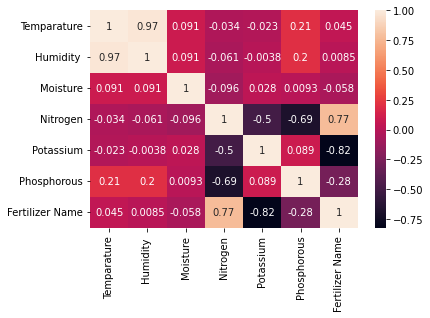

In [45]:
import seaborn as sns

sns.heatmap(tes.corr(), annot=True)

In [46]:
# print(df.head())

In [47]:
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [48]:
df['Soil Type'].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

Visualisasi Data

<Axes: xlabel='Soil Type', ylabel='count'>

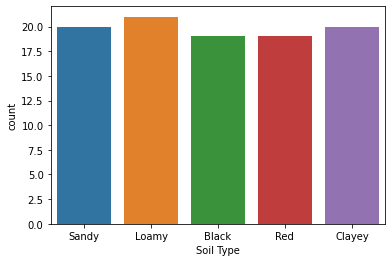

In [49]:
import seaborn as sns
sns.countplot(x='Soil Type', data = df)

<Axes: xlabel='Crop Type', ylabel='count'>

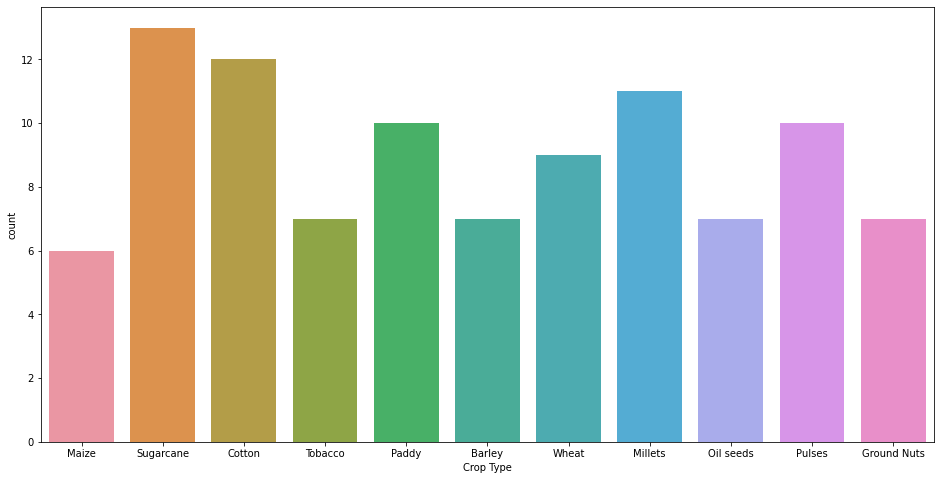

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
sns.countplot(x='Crop Type', data = df)

<Axes: xlabel='Fertilizer Name', ylabel='count'>

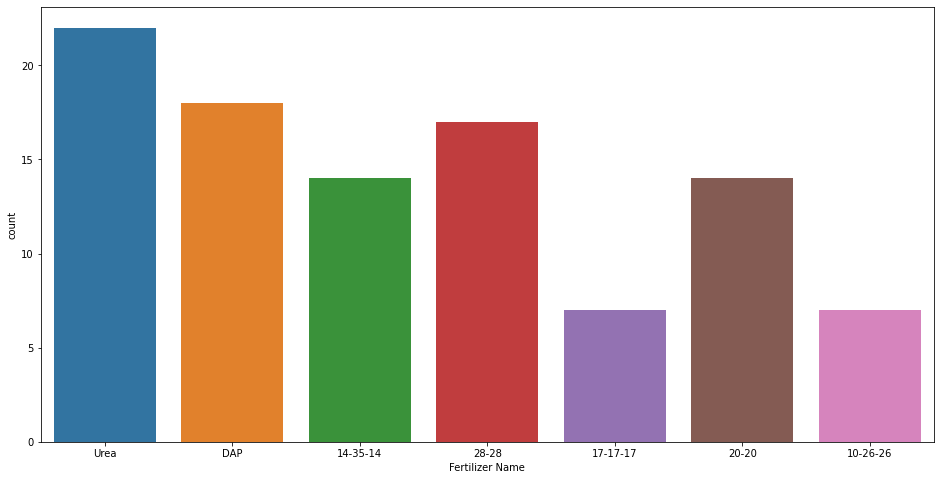

In [51]:
plt.figure(figsize=(16,8))
sns.countplot(x='Fertilizer Name', data = df)

In [52]:
#Defining function for Continuous and catogorical variable
def plot_conti(x):
    fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Histogram')
    sns.histplot(x,ax=axes[0])
    axes[1].set_title('Checking Outliers')
    sns.boxplot(x,ax=axes[1])
    axes[2].set_title('Relation with output variable')
    sns.boxplot(y = x,x = df['Fertilizer Name'])
    
def plot_cato(x):
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Count Plot')
    sns.countplot(x,ax=axes[0])
    axes[1].set_title('Relation with output variable')
    sns.countplot(x = x,hue = df['Fertilizer Name'], ax=axes[1])

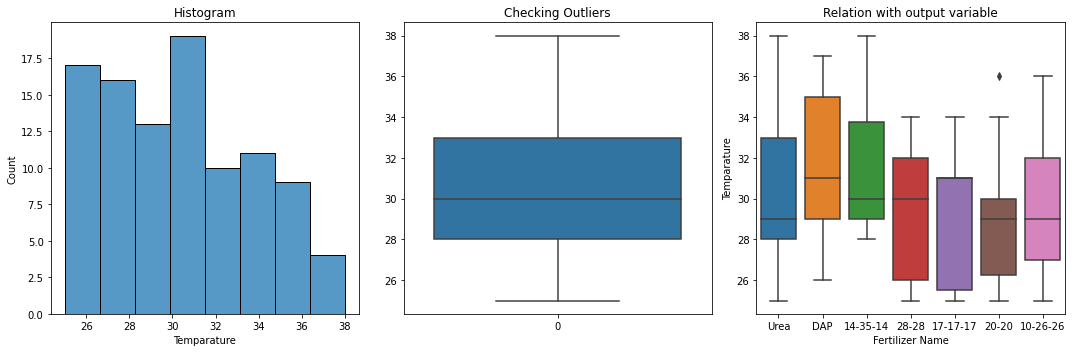

In [53]:
#EDA - Temparature variable
plot_conti(df['Temparature'])

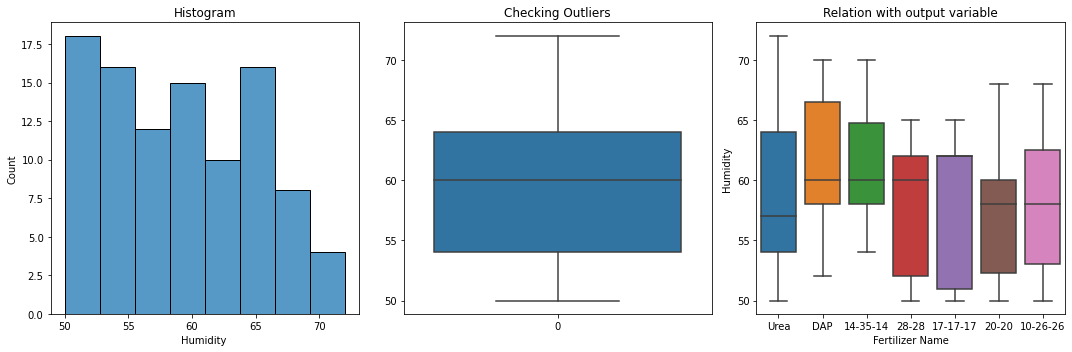

In [54]:
#EDA - Humidity variable
plot_conti(df['Humidity '])

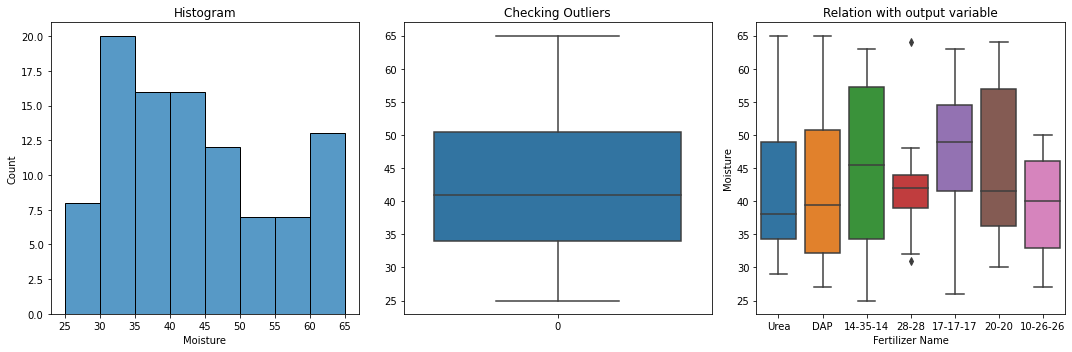

In [55]:
#EDA - Moisture variable
plot_conti(df['Moisture'])

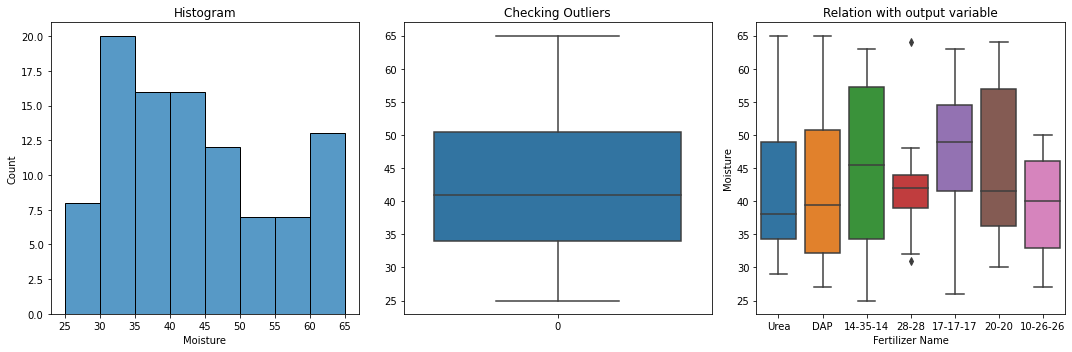

In [56]:
#EDA - Moisture variable
plot_conti(df['Moisture'])

<Axes: xlabel='Soil Type', ylabel='Temparature'>

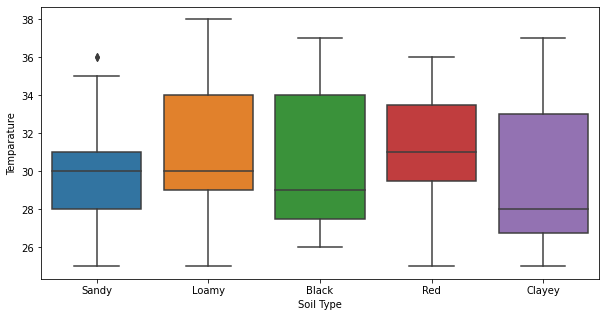

In [57]:
#relation of soil type with Temperature 
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Soil Type'],y=df['Temparature'])

In [58]:
y = df['Fertilizer Name'].copy()
X = df.drop('Fertilizer Name', axis=1).copy()

print(X.head())

   Temparature  Humidity   Moisture Soil Type  Crop Type  Nitrogen  Potassium   
0           26         52        38     Sandy      Maize        37          0  \
1           29         52        45     Loamy  Sugarcane        12          0   
2           34         65        62     Black     Cotton         7          9   
3           32         62        34       Red    Tobacco        22          0   
4           28         54        46    Clayey      Paddy        35          0   

   Phosphorous  
0            0  
1           36  
2           30  
3           20  
4            0  


One-hot encoding

In [59]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Ini kalo pake column transformer
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3,4])], remainder='passthrough')
X = np.array(ct.fit_transform(X))  
X
# coba nu aing pake encoder biasa
# X = df['Soil Type'].values.reshape(-1,1)
# X


array([[ 0.,  0.,  0., ..., 37.,  0.,  0.],
       [ 0.,  0.,  1., ..., 12.,  0., 36.],
       [ 1.,  0.,  0., ...,  7.,  9., 30.],
       ...,
       [ 0.,  0.,  1., ..., 39.,  0.,  0.],
       [ 0.,  0.,  0., ..., 15.,  0., 41.],
       [ 1.,  0.,  0., ..., 12.,  0., 10.]])

In [60]:
# from sklearn.preprocessing import OneHotEncoder

# onehot_encoder = OneHotEncoder()
# X = onehot_encoder.fit_transform(X).toarray()
# X

In [61]:
# onehot_encoder.categories_

In [62]:
# df_onehot = pd.DataFrame(X, columns=[str(int(i)) for i in range(X.shape[1])])
# df_onehot

In [63]:
# df = pd.concat([df_onehot, df], axis=1)
# df

Label Encoding (test)

In [64]:
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()
# df['Soil Type'] = label_encoder.fit_transform(df['Soil Type'])
# df


In [65]:
# label_encoder.classes_

In [66]:
# X[0]

Train test split

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=42)

Feature scaling

In [68]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [69]:
X_train[0]

array([-0.48181206,  1.98206242, -0.59408853, -0.50452498, -0.41169348,
       -0.24806947, -0.33601075, -0.33601075, -0.17277369, -0.36214298,
       -0.24806947, -0.36214298,  3.24037035, -0.43549417, -0.24806947,
       -0.36214298, -1.50323411, -1.54242294, -1.00710689,  0.46072126,
       -0.57643157,  0.09092764])

Random forest classifier

In [70]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [71]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    10-26-26       1.00      0.67      0.80         3
    14-35-14       1.00      1.00      1.00         4
    17-17-17       0.67      1.00      0.80         2
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         6
         DAP       1.00      1.00      1.00         7
        Urea       1.00      1.00      1.00         7

    accuracy                           0.97        30
   macro avg       0.95      0.95      0.94        30
weighted avg       0.98      0.97      0.97        30



Creating confusion matrix

In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2 0 1 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 6 0 0]
 [0 0 0 0 0 7 0]
 [0 0 0 0 0 0 7]]


0.9666666666666667

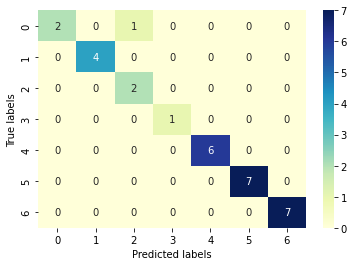

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat heatmap dari confusion matrix
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d")

# Menambahkan label pada sumbu x dan y
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Menampilkan plot
plt.show()

In [74]:
classifier.score(X_test, y_test)

NameError: name 'classifier' is not defined

Prepocesing using label encoder

In [ ]:
#encoding the labels for categorical variables
from sklearn.preprocessing import LabelEncoder

encode_crop =  LabelEncoder()
df['Crop Type'] = encode_crop.fit_transform(df['Crop Type'])

#creating the DataFrame
Crop_Type = pd.DataFrame(zip(encode_crop.classes_,encode_crop.transform(encode_crop.classes_)),columns=['Original','Encoded'])
Crop_Type = Crop_Type.set_index('Original')
Crop_Type

,Encoded
Original,
Barley,0
Cotton,1
Ground Nuts,2
Maize,3
Millets,4
Oil seeds,5
Paddy,6
Pulses,7
Sugarcane,8


In [ ]:
#encoding Soil Type variable
encode_soil = LabelEncoder()
df['Soil Type'] = encode_soil.fit_transform(df['Soil Type'])

#creating the DataFrame
Soil_Type = pd.DataFrame(zip(encode_soil.classes_,encode_soil.transform(encode_soil.classes_)),columns=['Original','Encoded'])
Soil_Type = Soil_Type.set_index('Original')
Soil_Type

,Encoded
Original,
Black,0
Clayey,1
Loamy,2
Red,3
Sandy,4


In [ ]:
encode_ferti = LabelEncoder()
df['Fertilizer Name'] = encode_ferti.fit_transform(df['Fertilizer Name'])

#creating the DataFrame
Fertilizer = pd.DataFrame(zip(encode_ferti.classes_,encode_ferti.transform(encode_ferti.classes_)),columns=['Original','Encoded'])
Fertilizer = Fertilizer.set_index('Original')
Fertilizer

,Encoded
Original,
10-26-26,0
14-35-14,1
17-17-17,2
20-20,3
28-28,4
DAP,5
Urea,6


In [ ]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop('Fertilizer Name',axis=1),df['Fertilizer Name'],test_size=0.2,random_state=1)
print('Shape of Splitting :')
print('x_train = {}, y_train = {}, x_test = {}, y_test = {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

Shape of Splitting :
x_train = (79, 8), y_train = (79,), x_test = (20, 8), y_test = (20,)


In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79 entries, 2 to 37
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Temparature  79 non-null     int64
 1   Humidity     79 non-null     int64
 2   Moisture     79 non-null     int64
 3   Soil Type    79 non-null     int32
 4   Crop Type    79 non-null     int32
 5   Nitrogen     79 non-null     int64
 6   Potassium    79 non-null     int64
 7   Phosphorous  79 non-null     int64
dtypes: int32(2), int64(6)
memory usage: 4.9 KB


In [ ]:
rand = RandomForestClassifier(random_state = 42)
rand.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
pred_rand = rand.predict(x_test)

Hyperparameter tuning using grid search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

params = {
    'n_estimators':[300,400,500],
    'max_depth':[5,10,15],
    'min_samples_split':[2,5,8]
}
grid_rand = GridSearchCV(rand,params,cv=3,verbose=3,n_jobs=-1)

grid_rand.fit(x_train,y_train)

pred_rand = grid_rand.predict(x_test)

print(classification_report(y_test,pred_rand))

print('Best score : ',grid_rand.best_score_)
print('Best params : ',grid_rand.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.75      1.00      0.86         3
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         6

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.88        20
weighted avg       0.93      0.90      0.88        20

Best score :  0.9748338081671415
Best params :  {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
y_train[2]

1

Pickling file

In [ ]:
#pickling the file
import pickle
pickle_out = open('classifier.pkl','wb')
pickle.dump(grid_rand,pickle_out)
pickle_out.close()

In [ ]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,3,37,0,0,6
1,29,52,45,2,8,12,0,36,5
2,34,65,62,0,1,7,9,30,1
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,6


In [ ]:
model = pickle.load(open('classifier.pkl','rb'))
ans = model.predict([[26,52,38	,4,	3,	37,	0,	0]])
if ans[0] == 0:
    print("10-26-26")
elif ans[0] ==1:
    print("14-35-14")
elif ans[0] == 2:
    print("17-17-17	")
elif ans[0] == 3:
    print("20-20")
elif ans[0] == 4:
    print("28-28")
elif ans[0] == 5:
    print("DAP")
else:
    print("Urea")

Urea


c:\Users\ichsa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
